In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from scipy.optimize import minimize_scalar

In [61]:
with open(f'../../../loss/ResDepth_lr_tuning_loss_final.pkl', 'rb') as f:
        experiment_data = pickle.load(f)

In [62]:
df = pd.DataFrame.from_dict(
    experiment_data,
    orient='index',
    columns=['learning_rate', 'weight_decay', 'epoch_min_val_loss', 'min_val_loss']
)

In [63]:
df

,learning_rate,weight_decay,epoch_min_val_loss,min_val_loss
0,0.000088,0.000028,57,0.000944
1,0.000021,0.000121,69,0.001020
2,0.000567,0.000449,76,0.001021
3,0.000728,0.000051,94,0.000990
4,0.000387,0.000149,68,0.000932
5,0.000157,0.000131,98,0.000904
6,0.000042,0.000038,55,0.000974
7,0.000457,0.000105,62,0.000911
8,0.000213,0.000455,59,0.000929
9,0.000165,0.000125,81,0.000923


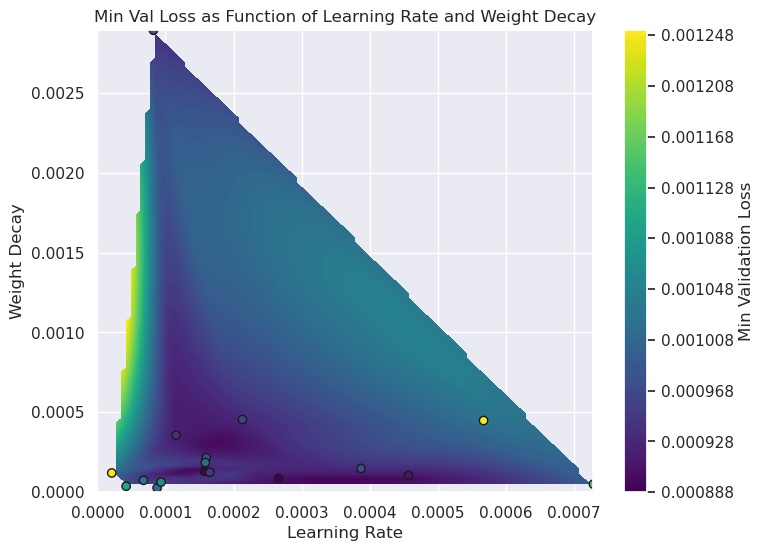

In [64]:
# Extract data
x = df['learning_rate'].values
y = df['weight_decay'].values
z = df['min_val_loss'].values

# Define grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Contour plot
c = ax.contourf(xi, yi, zi, levels=100, cmap='viridis')

# Overlay scatter points
scatter = ax.scatter(x, y, c=z, cmap='viridis', edgecolor='k')

# Labels and colorbar
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Weight Decay')
ax.set_title('Min Val Loss as Function of Learning Rate and Weight Decay')
ax.set_xlim(0)
ax.set_ylim(0)
fig.colorbar(c, ax=ax, label='Min Validation Loss')

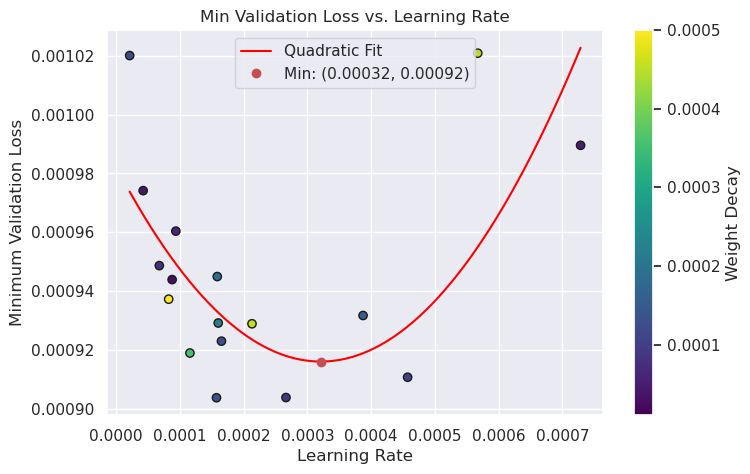

In [67]:
sns.set_theme()

# Extract x and y values
x = df['learning_rate'].values
y = df['min_val_loss'].values

# Fit a cubic polynomial
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)

# Generate smooth x values for plotting the fitted curve
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_fit)

res = minimize_scalar(poly, bounds=(x.min(), x.max()), method='bounded')
min_x = res.x
min_y = res.fun

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of data
sc = ax.scatter(x, y, c=df['weight_decay'], edgecolor='k', cmap='viridis', vmin=0.00001, vmax=0.0005)
plt.colorbar(sc, label='Weight Decay')

# Plot fitted cubic curve
ax.plot(x_fit, y_fit, color='red', label='Quadratic Fit')

# Mark the minimum
ax.plot(min_x, min_y, 'ro', label=f'Min: ({min_x:.5f}, {min_y:.5f})')

# Labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Minimum Validation Loss')
ax.set_title('Min Validation Loss vs. Learning Rate')
ax.legend()

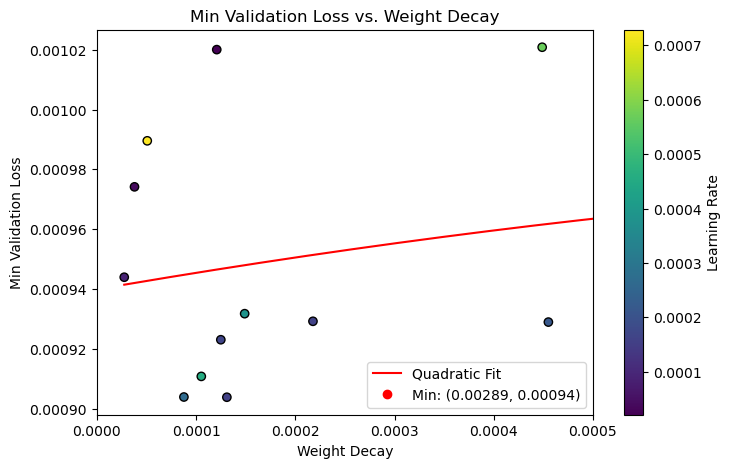

In [42]:
# Extract x and y values
x = df['weight_decay'].values
y = df['min_val_loss'].values

# Fit a cubic polynomial
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)

# Generate smooth x values for plotting the fitted curve
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_fit)

res = minimize_scalar(poly, bounds=(x.min(), x.max()), method='bounded')
min_x = res.x
min_y = res.fun

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of data
sc = ax.scatter(x, y, c=df['learning_rate'], edgecolor='k', cmap='viridis')
plt.colorbar(sc, label='Learning Rate')

# Plot fitted cubic curve
ax.plot(x_fit, y_fit, color='red', label='Quadratic Fit')

# Mark the minimum
ax.plot(min_x, min_y, 'ro', label=f'Min: ({min_x:.5f}, {min_y:.5f})')
ax.set_xlim(0, 0.0005)

# Labels and title
ax.set_xlabel('Weight Decay')
ax.set_ylabel('Min Validation Loss')
ax.set_title('Min Validation Loss vs. Weight Decay')
ax.legend()

In [18]:
df

,learning_rate,weight_decay,epoch_min_val_loss,min_val_loss
0,0.000088,0.000028,57,0.000944
1,0.000021,0.000121,69,0.001020
2,0.000567,0.000449,76,0.001021
3,0.000728,0.000051,94,0.000990
4,0.000387,0.000149,68,0.000932
5,0.000157,0.000131,98,0.000904
6,0.000042,0.000038,55,0.000974
7,0.000457,0.000105,62,0.000911
8,0.000213,0.000455,59,0.000929
9,0.000165,0.000125,81,0.000923


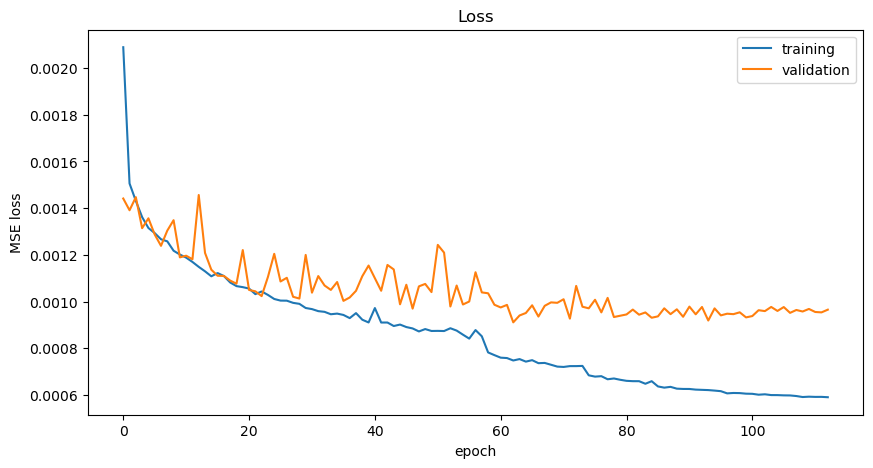

In [32]:
with open(f'../../../loss/ResDepth_lr0.000457131171011064_weightdecay0.00010523970398286011_test_loss.pkl', 'rb') as f:
        val_loss = pickle.load(f)

with open(f'../../../loss/ResDepth_lr0.000457131171011064_weightdecay0.00010523970398286011_train_loss.pkl', 'rb') as f:
        train_loss = pickle.load(f)


# plot loss over all epochs
f, ax = plt.subplots(figsize=(10,5))
ax.plot(train_loss, label='training')
ax.plot(val_loss, label='validation')
ax.set_xlabel('epoch')
ax.set_ylabel('MSE loss')
ax.set_title('Loss')
ax.legend()

# # save figure
# plt.savefig(f'../../../figs/quinn_ResDepth_v12_loss.png', dpi=300)